<font color="green">**ARIMA model for generating single day prediction.**</font>

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader as web

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


**Get stock data and visualize**

In [17]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-11-24')
#df = web.DataReader('AMD', data_source='yahoo', start='2015-01-01', end='2020-11-24')
#df = web.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2020-11-24')
#df = web.DataReader('DIS', data_source='yahoo', start='2015-01-01', end='2020-11-24')
#Show the data 
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624


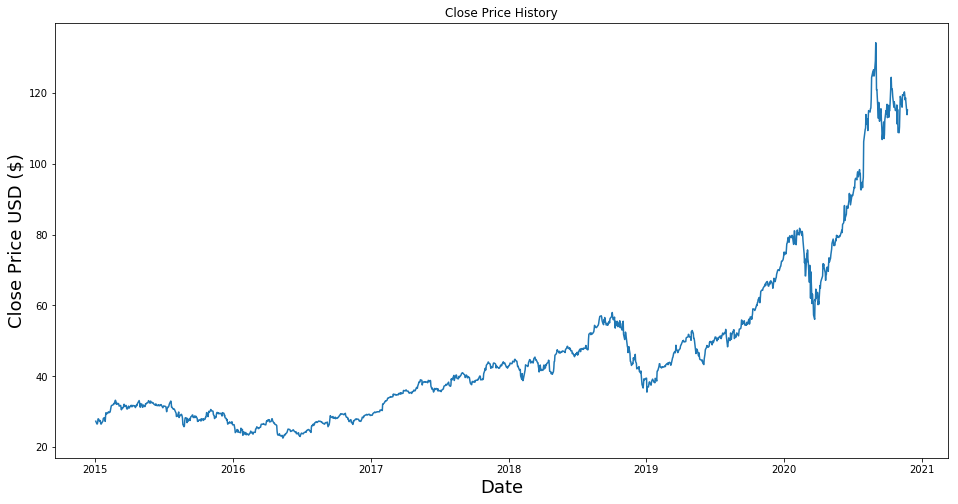

In [19]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

**Split the data set in train-test data**

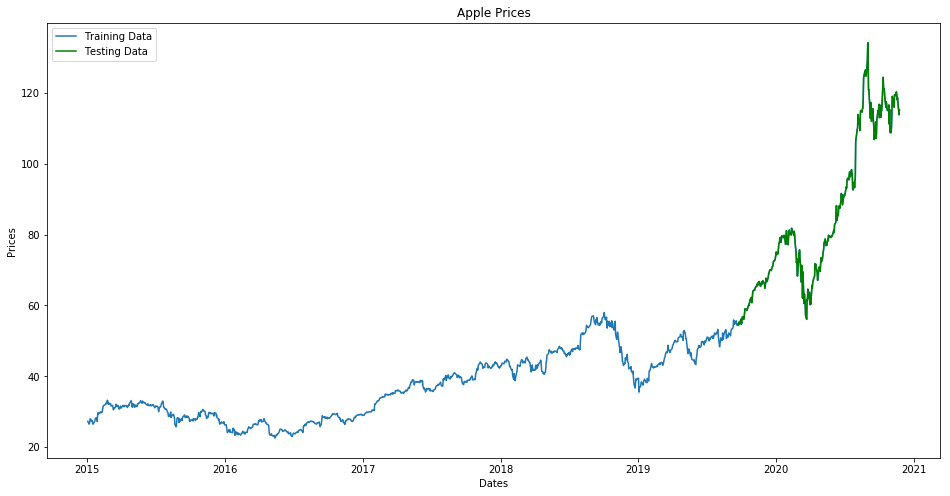

In [20]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [21]:
train_data.head(-10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624
...,...,...,...,...,...,...
2019-08-30,52.612499,51.799999,52.540001,52.185001,84573600.0,51.164417
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.419273
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.274715


**Define functions to calculate error rate of the predictions**

In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [26]:
def trend_accuracy(y_true,y_pred):
    total = 0
    correctpred = 0
    for i in range(1,len(y_true)):
        if y_true[i] > y_true[i-1] and y_pred[i] > y_pred[i-1]:
            correctpred+=1
        elif y_true[i] < y_true[i-1] and y_pred[i] < y_pred[i-1]:
            correctpred+=1
        total+=1
    return correctpred/total

<font color="green">**Train model and generate predictions**</font>

**Hyperparameters -> p,d,q = 1,1,1**

In [40]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
#print(history)
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #history.append(yhat[0])
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error2 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error2)
accuracy = trend_accuracy(test_data['Close'],predictions)
print('Accuracy of trends: %.3f' % accuracy)

C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 5.419
Root Mean Squared Error: 2.328
Symmetric mean absolute percentage error: 27.692
Mean absolute percentage error: 29.208
Accuracy of trends: 0.441


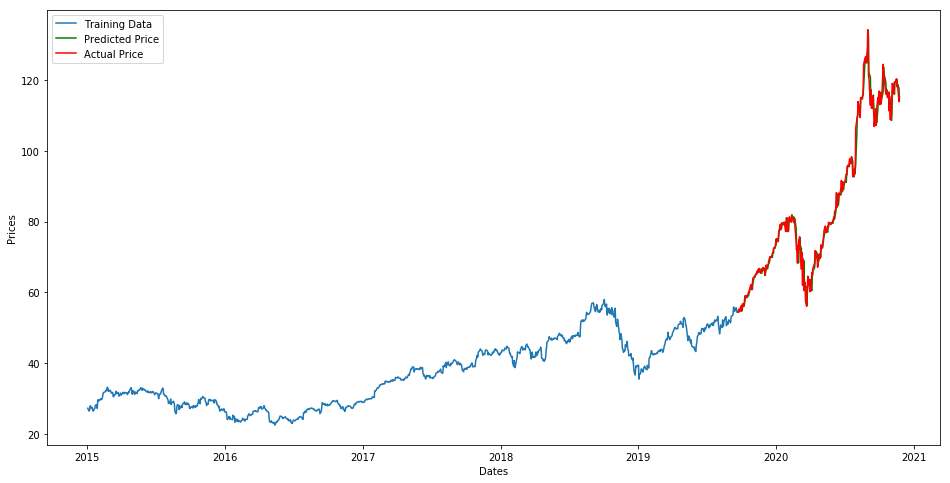

In [41]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 2,1,1**

In [42]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
#print(history)
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #history.append(yhat[0])
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error2 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error2)
accuracy = trend_accuracy(test_data['Close'],predictions)
print('Accuracy of trends: %.3f' % accuracy)

C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np

Testing Mean Squared Error: 5.447
Root Mean Squared Error: 2.334
Symmetric mean absolute percentage error: 27.710
Mean absolute percentage error: 29.234
Accuracy of trends: 0.448


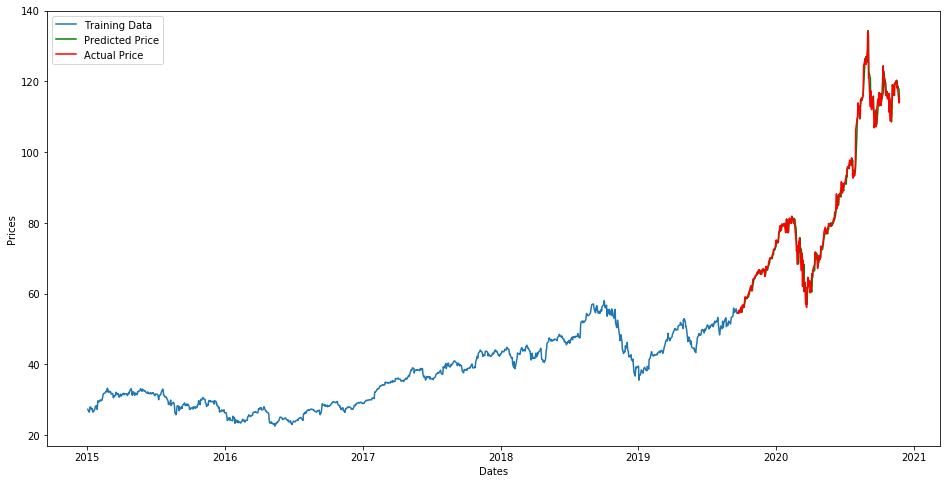

In [43]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 5,1,1**

In [44]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
#print(history)
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #history.append(yhat[0])
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error2 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error2)
accuracy = trend_accuracy(test_data['Close'],predictions)
print('Accuracy of trends: %.3f' % accuracy)

C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 5.534
Root Mean Squared Error: 2.352
Symmetric mean absolute percentage error: 27.698
Mean absolute percentage error: 29.225
Accuracy of trends: 0.444


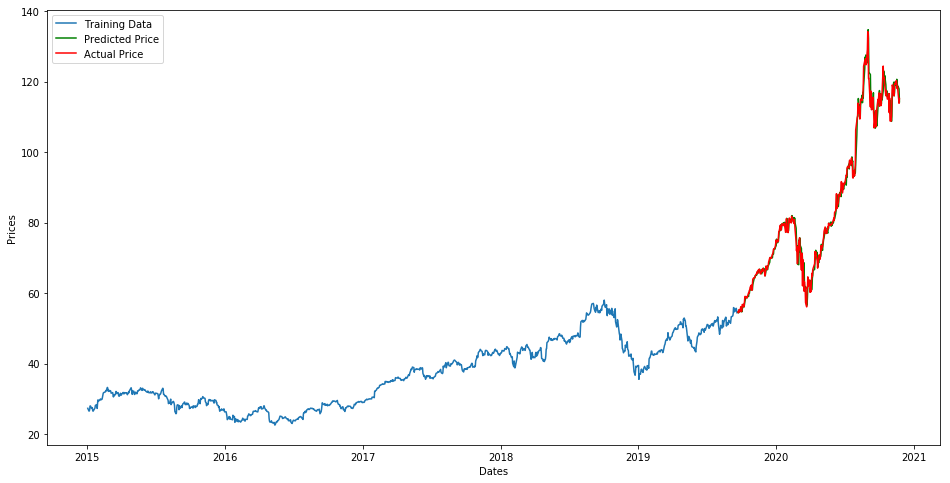

In [29]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 2,1,2**

In [46]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
#print(history)
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #history.append(yhat[0])
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error2 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error2)
accuracy = trend_accuracy(test_data['Close'],predictions)
print('Accuracy of trends: %.3f' % accuracy)

C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Testing Mean Squared Error: 5.464
Root Mean Squared Error: 2.337
Symmetric mean absolute percentage error: 27.696
Mean absolute percentage error: 29.219
Accuracy of trends: 0.458


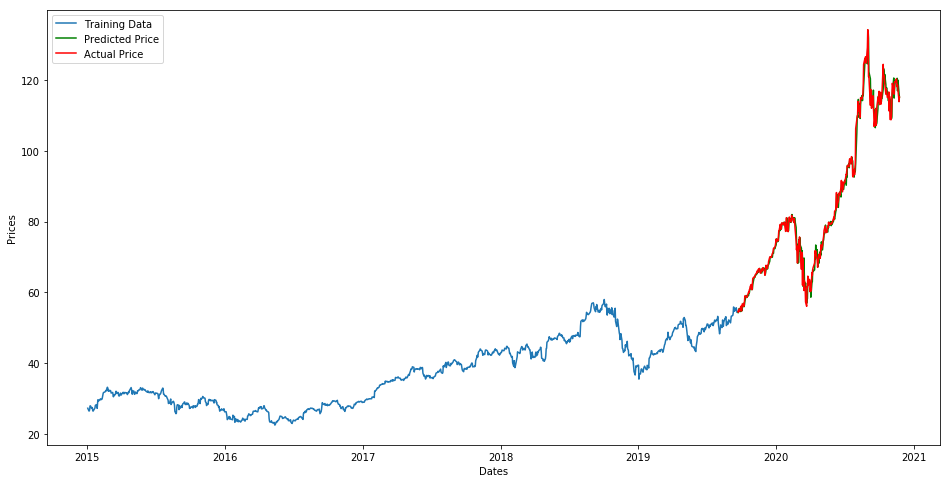

In [47]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 2,2,1**

In [49]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
#print(history)
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #history.append(yhat[0])
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error2 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error2)
accuracy = trend_accuracy(test_data['Close'],predictions)
print('Accuracy of trends: %.3f' % accuracy)

C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Testing Mean Squared Error: 5.551
Root Mean Squared Error: 2.356
Symmetric mean absolute percentage error: 27.750
Mean absolute percentage error: 29.299
Accuracy of trends: 0.451


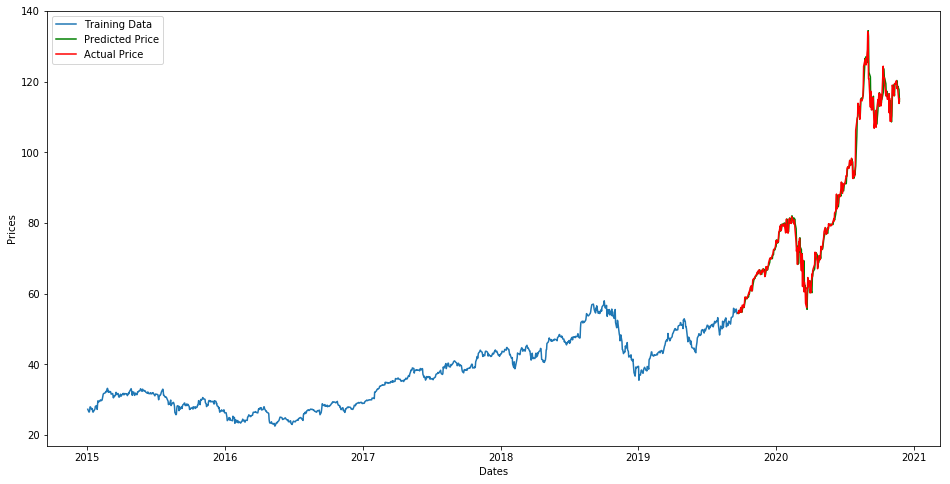

In [50]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 5,2,1**

In [52]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
#print(history)
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    #print(yhat)
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #history.append(yhat[0])
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error2 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error2)
accuracy = trend_accuracy(test_data['Close'],predictions)
print('Accuracy of trends: %.3f' % accuracy)

C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\mode

Testing Mean Squared Error: 5.672
Root Mean Squared Error: 2.382
Symmetric mean absolute percentage error: 27.748
Mean absolute percentage error: 29.298
Accuracy of trends: 0.451


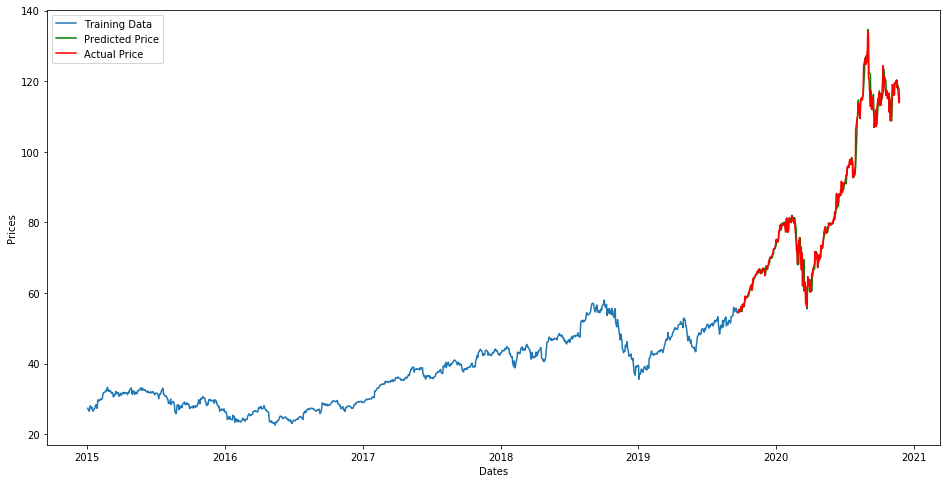

In [53]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()